In [1]:
%matplotlib inline
import glob
import utils_note
plt.rcParams["font.size"] = 12


def get_all_exp_curves(pdir):
    curve_dirs = [osp.join(d, 'learning_curves') for d in glob.glob(pdir+'/*')]
    return sorted(curve_dirs)

def plot_curves(ax, curve_dir, y_colns_template=None):
    each_exp_dir = curve_dir.split('/')[-2]
    df_r =  pd.read_csv(osp.join(curve_dir, 'agents_rewards.csv'))
    df_m = pd.read_csv(osp.join(curve_dir, 'agents_energy.csv'))
    _df = pd.merge(df_r, df_m, on=['episode', 'step']).drop(['step'], axis=1)
    
    if y_colns_template is not None:
        agents = set([c.split('_')[0] for c in _df.columns if c.startswith('agent')])
        for agent in agents:            
            kwargs = {}
            linestyles = ['-', '--', '-.', ':']
            for i, y_coln in  enumerate(y_colns_template):
                    y_coln = '%s_%s' % (agent, y_coln)
                    kwargs['linestyle'] = linestyles[i % len(linestyles)]
                    _df.plot(x='episode', y=y_coln, ax=ax, title=each_exp_dir, **kwargs)
                    kwargs['color'] = ax.get_lines()[-1].get_color()
    else:
        _df.plot(x='episode', ax=ax, title=each_exp_dir, **kwargs)
    ax.set_ylim([-200, 10])

def plot_training(each_exp_dir, y_columns):
    curve_dir = osp.join(each_exp_dir, 'learning_curves')
    fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))
    plot_curves(ax, curve_dir, y_columns)
    
def plot_energy(fn_video):
    fn_csvs =\
        glob.glob(fn_video.replace('.mp4', '_energy_agent*.csv'))
    dfs = []
    for fn_csv in fn_csvs:
        dfs.append(pd.read_csv(fn_csv))

    fig, ax = plt.subplots(1, 1, figsize=(24, 4))
    legends = []
    for i, df_agent in enumerate(dfs):
        df_agent.plot(y='energy0', ax=ax)
        legends.append('agent%d energy' % i)
    ax.legend(legends)

    # plot end-episode line
    df_ = dfs[0]
    end_epi = 0
    for epi in sorted(df_['episode'].unique()):
        end_epi +=  df_.loc[df_['episode'] == epi, 'step'].max() + 1
        ax.axvline(end_epi, color='orange', ls='--')

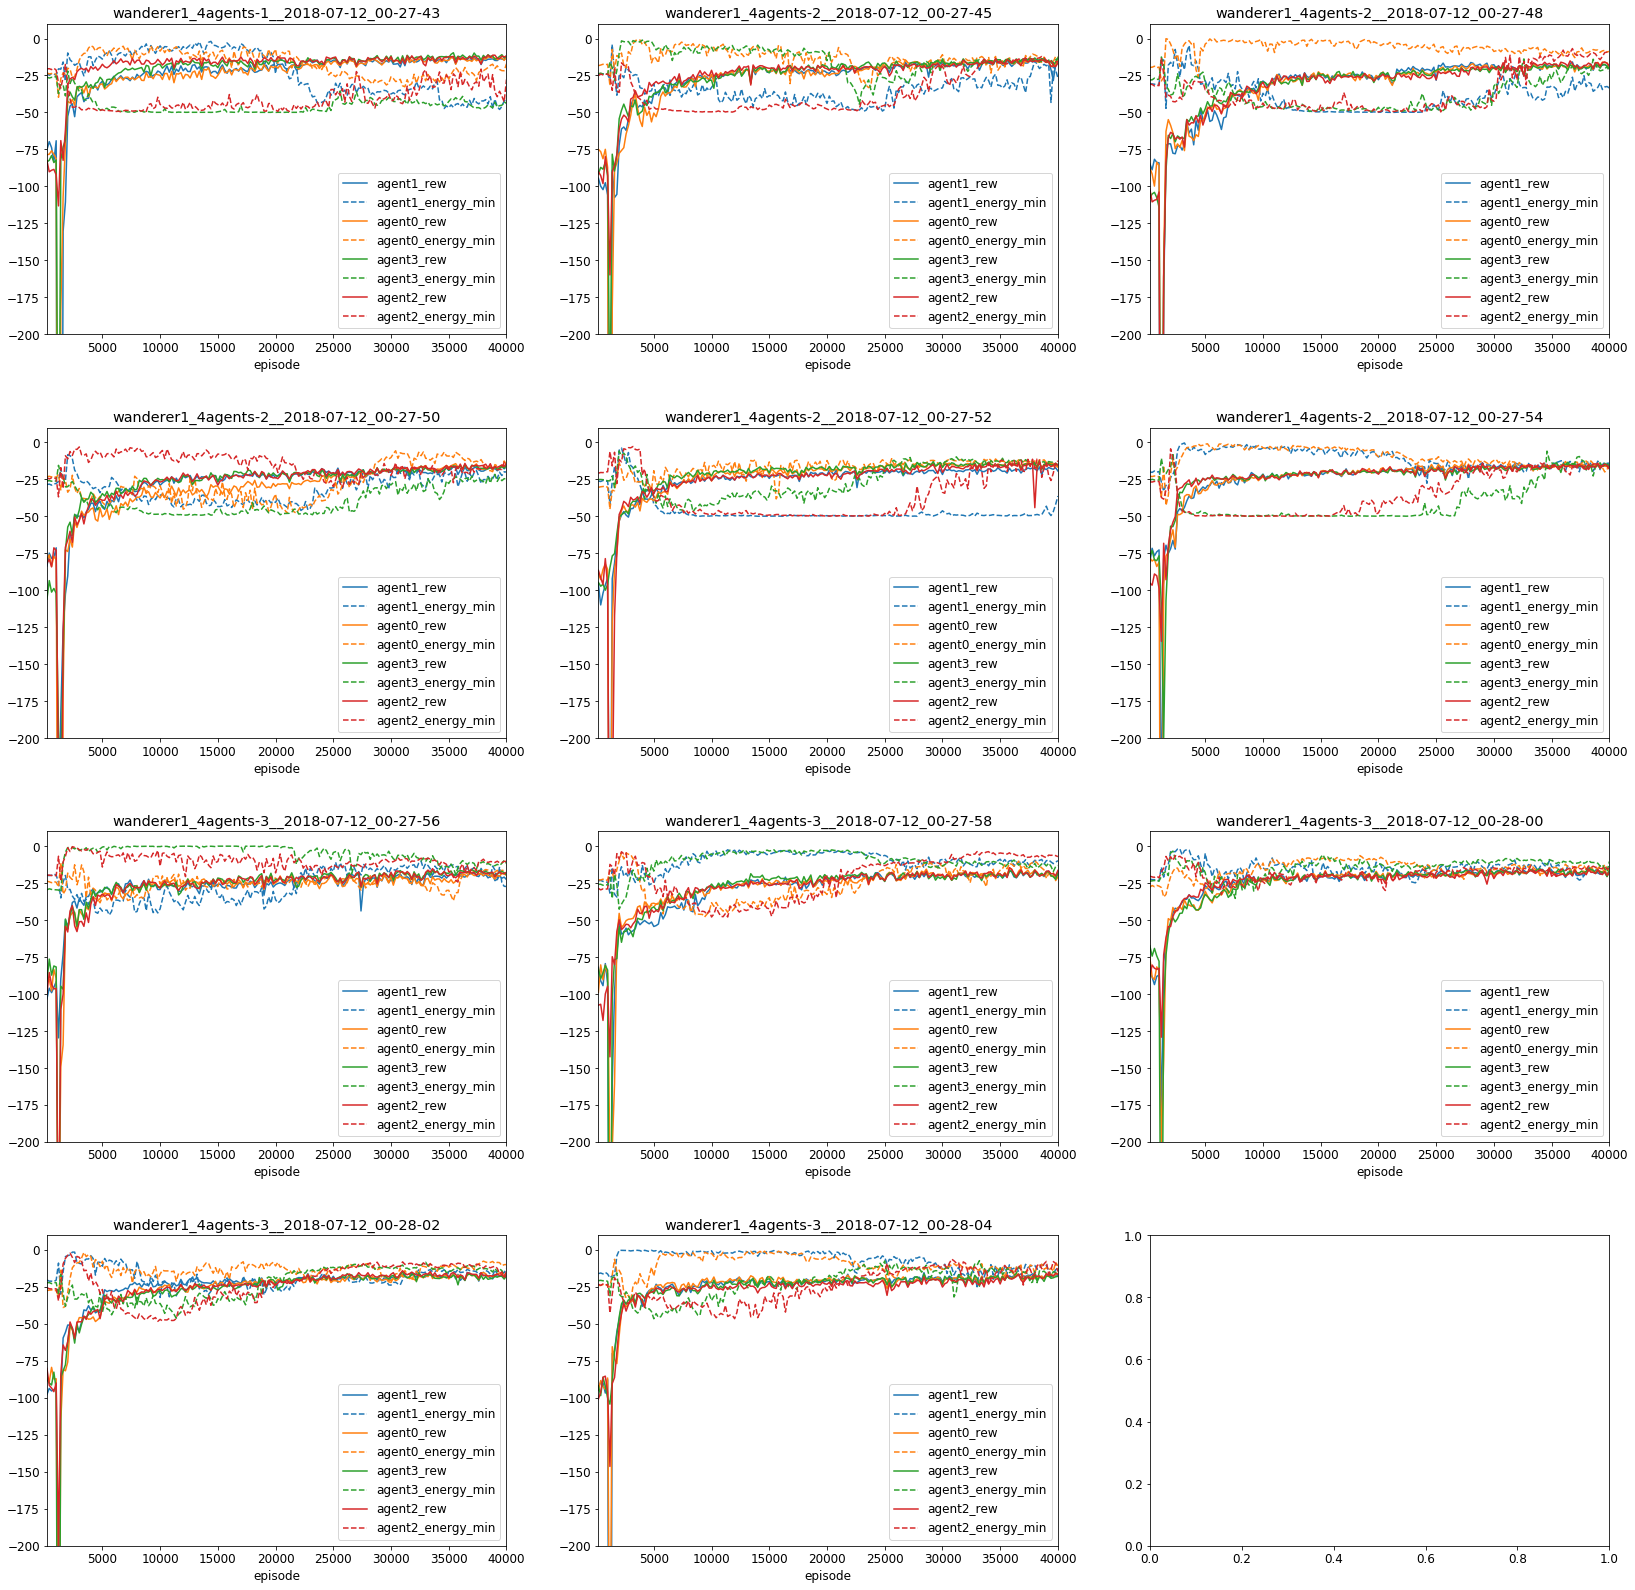

In [4]:
exp_dir = '../exp_results/exp9_180712'
y_columns = ['rew', 'energy_min']
fig, axes = plt.subplots(4, 3, figsize=(28, 28))
plt.subplots_adjust(hspace=0.3)
axes = axes.flatten()

curve_dirs = get_all_exp_curves(exp_dir)
for i, curve_dir in enumerate(curve_dirs):
    ax = axes[i]
    plot_curves(ax, curve_dir, y_columns)
